![terms on segmentation](./terms_on_segmentation.png)

### Instance Segmentation
우리가 지금까지 배워왔던 방식으로 짐작해 본다면 물체 검출(object detection) 모델로 각 개체를 구분하고 이후에 각 개체 별로 시맨틱 세그멘테이션을 수행하면 인스턴스 세그멘테이션을 할 수 있지 않을까요?

### 주요 세그멘테이션 모델 (1) FCN(Fully Convolutional Network)

* FCN은 이미지넷 챌린지(ImageNet Challenge)에서 좋은 성적을 거두었던 AlexNet, VGG-16 등의 모델을 세그멘테이션에 맞게 변형한 모델입니다.
* 기본적인 VGG 모델은 이미지의 특성을 추출하기 위한 네트워크의 뒷단에 fully connected layer를 붙여서 계산한 클래스별 확률을 바탕으로 이미지 분류를 수행합니다.
* **FCN에서는 세그멘테이션을 하기 위해서 네트워크 뒷단에 fully connected layer 대신 CNN을 붙여줍니다.**

여기서 fully connected layer 대신 CNN을 붙여주는 이유가 뭘까요?

아시다시피 CNN은 이미지 내 위치의 특성을 유지합니다. 하지만 fully connected layer는 위치를 고려하지 않게 되죠. 위치정보를 유지하면서 클래스 단위의 히트맵(heat map)을 얻어 세그멘테이션을 하기 위해, fully connected layer를 CNN으로 대체합니다.

그렇다면 마지막 CNN은 어떤 세팅을 갖게 될까요? 위치의 특성을 유지하면서 이미지 분류를 하기 위해서 **마지막 CNN은 1x1의 커널 크기(kernel size)와 클래스의 개수만큼의 채널**을 갖습니다. 이렇게 CNN을 거치면 클래스 히트맵을 얻을 수 있습니다.

하지만 히트맵의 크기는 일반적으로 원본 이미지보다 작습니다. CNN과 pooling 레이어를 거치면서 크기가 줄었기 때문인데요. 이를 키워주는 방법을 **upsampling** 이라고 합니다. Upsampling에는 여러 가지 방법이 있습니다. 그중 FCN에서는 Deconvolution과 Interpolation 방식을 활용합니다. Deconvolution은 컨볼루션 연산을 거꾸로 해준 것이라고 볼 수 있습니다. Interpolation은 보간법으로 주어진 값들을 통해 추정해야 하는 픽셀(여기서는 특성 맵의 크기가 커지면서 메꾸어야 하는 중간 픽셀들을 의미합니다.) 추정하는 방법입니다.

### 주요 세그멘테이션 모델 (2) U-Net

U-Net은 이름에서 볼 수 있듯이 네트워크 구조가 U자 형태를 띠고 있습니다. **FCN에서 upsampling을 통해서 특성 맵을 키운 것을 입력값과 대칭적으로 만들어 준 것인데요.** 특이한 점은 U-Net이 세그멘테이션뿐만 아니라 여러 가지 이미지 태스크에서 사용되는 유명한 네트워크가 되었지만, 본래 의학 관련 논문으로 시작되었다는 점입니다. 논문 제목에서도 biomedical image segmentation을 위한 네트워크라는 점을 알 수 있습니다. 아래 Fig.2. 그림과 같이 세포의 영역을 세그멘테이션 하기 위해 개발된 방법입니다.

### 주요 세그멘테이션 모델 (3) DeepLab 계열

* Atrous Convolution 사용
* Atrous Convolution은 간단히 말하면 "띄엄띄엄 보는 컨볼루션"입니다. 위 그림에서 우측의 Atrous Convolution은 좌측의 일반적인 컨볼루션과 달리 더 넓은 영역을 보도록 해주기 위한 방법으로 커널이 일정 간격으로 떨어져 있습니다. 이를 통해 컨볼루션 레이어를 너무 깊게 쌓지 않아도 넓은 영역의 정보를 커버할 수 있게 됩니다.

### 세그멘테이션의 평가


* 결과값: 일반적으로 **시맨틱 세그멘테이션의 결괏값은 이미지의 크기에 맞는 세그멘테이션 맵 크기 와 시맨틱 클래스의 수에 맞는 채널 크기**를 갖습니다. 여기서 각 채널의 max probability에 따라서 해당 위치의 클래스가 결정됩니다.**인스턴스 세그멘테이션은 다르다는 추측을 할 수 있다.**

* 평가: 픽셀의 수만큼의 분류 문제로 평가할 수 있습니다.  
[평가관련 참조](https://www.jeremyjordan.me/evaluating-image-segmentation-models/)

#### 1) 픽셀별 정확도 (Pixel Accuracy)

2) 마스크 IoU (Mask Intersection-over-Union)  
* 물체 검출 모델을 평가할 때는 정답 라벨(ground truth)와 예측 결과 바운딩 박스(prediction bounding box) 사이의 IoU(intersection over union)를 사용합니다. 마스크도 일종의 영역임을 생각했을 때 세그멘테이션 문제에서는 정답인 영역과 예측한 영역의 IoU를 계산할 수 있을 것입니다. 아래 식처럼 세그멘테이션 마스크의 IoU는 생각보다 쉽게 계산할 수 있습니다.
* 마스크 IoU를 클래스 별로 계산하면 한 이미지에서 여러 클래스에 대한 IoU 점수를 얻을 수 있습니다. 이를 평균하면 전체적인 시맨틱 세그멘테이션 성능을 가늠할 수 있습니다.

```
# sample for mask iou
intersection = np.logical_and(target, prediction)
union = np.logical_or(target, prediction)
iou_score = np.sum(intersection) / np.sum(union)
```

### Upsampling의 다양한 방법

1) Nearest Neighbor

2) Bilinear Interpolation

3) Transposed Convolution

[transposed convolution 참조](https://zzsza.github.io/data/2018/06/25/upsampling-with-transposed-convolution/)

# 도로영역 찾기(Semantic Segmentation)

이번 시간에는 Semantic Segmentation(시맨틱 세그멘테이션) 을 이용해서 자율주행차량이 주행해야 할 도로 영역을 찾는 상황을 가정하고 모델을 만들어보는 시간을 갖겠습니다. 앞서 강의 노드에서는 Semantic Segmentation을 위한 다양한 모델을 배워보았습니다. 이번 시간에는 U-Net을 사용해서 이미지가 입력되면 도로의 영역을 Segmentation 하는 모델을 만들어보겠습니다.

최종적으로 만들어 볼 모델은 아래와 같습니다! 입력 이미지 위에 도로 영역으로 인식한 영역을 흰색으로 오버레이 한 이미지입니다.

### 시맨틱 세그멘테이션 데이터셋

먼저 시맨틱 세그멘테이션(semantic segmentation) 으로 도로의 영역을 분리하기 위해서는 도로의 영역을 라벨로 가진 데이터셋을 가지고 학습할 수 있도록 파싱 해야 합니다. 아래 링크를 통해서 물체 검출(object detection)으로 사용했던 KITTI 데이터셋의 세그멘테이션 데이터 를 다운로드합니다.
[download](https://www.cvlibs.net/datasets/kitti/eval_semantics.php)

아래는 데이터셋에서 확인할 수 있는 이미지와 라벨입니다. 지금까지 보던 라벨 데이터와 다르게 세그멘테이션 데이터는 이미지 형태의 라벨로 되어있습니다.

#### 데이터 로더(data loader) 만들기

이제 이미지와 데이터셋이 주어졌으니 모델을 학습시킬 수 있는 데이터 로더(data loader)를 만들어봅시다. 로더는 입력값 (224, 224), 출력값 (224, 244) 크기를 갖는 모델을 학습시킬 수 있도록 데이터셋을 파싱 해야 합니다.

이때 데이터 로더에 augmentation 을 적용해 봅시다. 오늘은 파이썬에서 많이 사용되는 albumentations을 사용해 보겠습니다. 하지만 Augmentation의 경우 imgaug 등 다른 라이브러리를 활용하셔도 됩니

In [1]:
#필요한 라이브러리를 로드합니다. 
import os
import math
import numpy as np

import tensorflow as tf

from PIL import Image
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from glob import glob

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

print('슝=3')

슝=3


Albumentation 의 사용법을 간단히 알아보겠습니다. 아래는 Albumentation에서 다양한 augmentation 기법을 확률적으로 적용할 수 있게 해주는 Compose()의 활용예입니다. imgaug의 Sometimes()와 유사한 기능입니다.

In [2]:
from albumentations import  HorizontalFlip, RandomSizedCrop, Compose, OneOf, Resize

def build_augmentation(is_train=True):
  if is_train:    # 훈련용 데이터일 경우
    return Compose([
                    HorizontalFlip(p=0.5),    # 50%의 확률로 좌우대칭
                    RandomSizedCrop(         # 50%의 확률로 RandomSizedCrop
                        min_max_height=(300, 370),
                        w2h_ratio=370/1242,
                        height=224,
                        width=224,
                        p=0.5
                        ),
                    Resize(              # 입력이미지를 224X224로 resize
                        width=224,
                        height=224
                        )
                    ])
  return Compose([      # 테스트용 데이터일 경우에는 224X224로 resize만 수행합니다. 
                Resize(
                    width=224,
                    height=224
                    )
                ])

build_augmentation() 확인

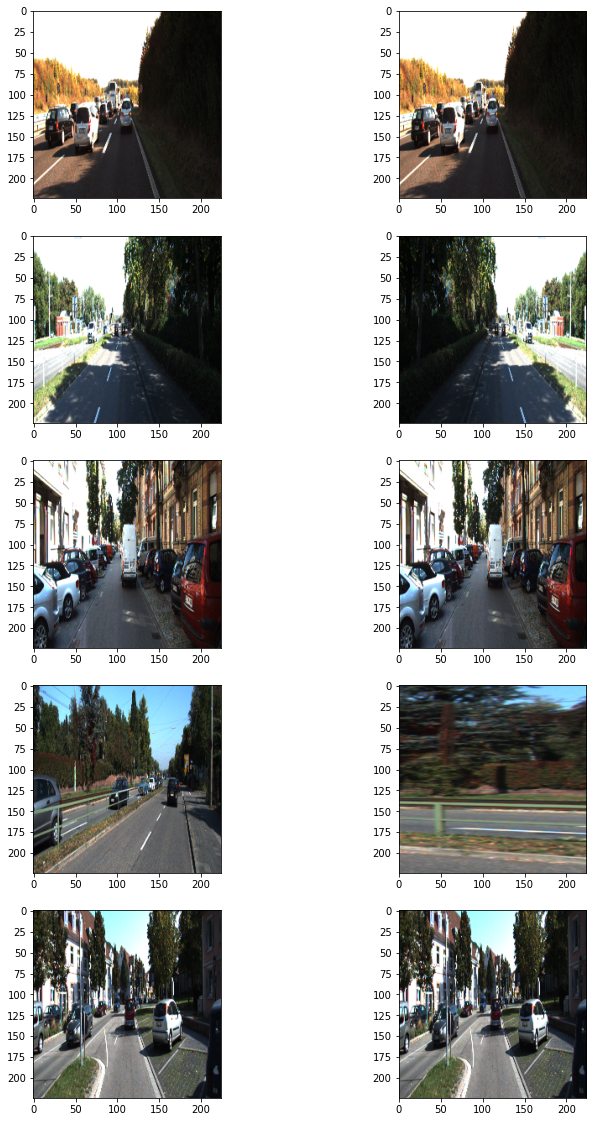

In [3]:
dir_path = os.getenv('HOME')+'/aiffel/semantic_segmentation/data/training'

augmentation_train = build_augmentation()
augmentation_test = build_augmentation(is_train=False)
input_images = glob(os.path.join(dir_path, "image_2", "*.png"))

# 훈련 데이터셋에서 5개만 가져와 augmentation을 적용해 봅시다.  
plt.figure(figsize=(12, 20))
for i in range(5):
    image = imread(input_images[i]) 
    image_data = {"image":image}
    resized = augmentation_test(**image_data)
    processed = augmentation_train(**image_data)
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(resized["image"])  # 왼쪽이 원본이미지
    plt.subplot(5, 2, 2*i+2)
    plt.imshow(processed["image"])  # 오른쪽이 augment된 이미지
  
plt.show()

이제 데이터셋을 구성해 봅시다. 이번에는 tf.keras.utils.Sequence를 상속받은 generator 형태로 데이터를 구성해 보겠습니다.

In [4]:
class KittiGenerator(tf.keras.utils.Sequence):
  '''
  KittiGenerator는 tf.keras.utils.Sequence를 상속받습니다.
  우리가 KittiDataset을 원하는 방식으로 preprocess하기 위해서 Sequence를 커스텀해 사용합니다.
  '''
  def __init__(self, 
               dir_path,
               batch_size=16,
               img_size=(224, 224, 3),
               output_size=(224, 224),
               is_train=True,
               augmentation=None):
    '''
    dir_path: dataset의 directory path입니다.
    batch_size: batch_size입니다.
    img_size: preprocess에 사용할 입력이미지의 크기입니다.
    output_size: ground_truth를 만들어주기 위한 크기입니다.
    is_train: 이 Generator가 학습용인지 테스트용인지 구분합니다.
    augmentation: 적용하길 원하는 augmentation 함수를 인자로 받습니다.
    '''
    self.dir_path = dir_path
    self.batch_size = batch_size
    self.is_train = is_train
    self.dir_path = dir_path
    self.augmentation = augmentation
    self.img_size = img_size
    self.output_size = output_size

    # load_dataset()을 통해서 kitti dataset의 directory path에서 라벨과 이미지를 확인합니다.
    self.data = self.load_dataset()

  def load_dataset(self):
    # kitti dataset에서 필요한 정보(이미지 경로 및 라벨)를 directory에서 확인하고 로드하는 함수입니다.
    # 이때 is_train에 따라 test set을 분리해서 load하도록 해야합니다.
    input_images = glob(os.path.join(self.dir_path, "image_2", "*.png"))
    label_images = glob(os.path.join(self.dir_path, "semantic", "*.png"))
    input_images.sort()
    label_images.sort()
    assert len(input_images) == len(label_images)
    data = [ _ for _ in zip(input_images, label_images)]

    if self.is_train:
      return data[:-30]
    return data[-30:]
    
  def __len__(self):
    # Generator의 length로서 전체 dataset을 batch_size로 나누고 소숫점 첫째자리에서 올림한 값을 반환합니다.
    return math.ceil(len(self.data) / self.batch_size)

  def __getitem__(self, index):
##################index가 명시되지 않은 경우, 일반적으로 이는 데이터셋을 순차적으로 순회하는 것을 의미합니다.#####################
    # 입력과 출력을 만듭니다.
    # 입력은 resize및 augmentation이 적용된 input image이고 
    # 출력은 semantic label입니다.
    batch_data = self.data[
                           index*self.batch_size:
                           (index + 1)*self.batch_size
                           ]
    inputs = np.zeros([self.batch_size, *self.img_size])
    outputs = np.zeros([self.batch_size, *self.output_size])
        
    for i, data in enumerate(batch_data):
      input_img_path, output_path = data
      _input = imread(input_img_path)
      _output = imread(output_path)
      _output = (_output==7).astype(np.uint8)*1  # 도로에 해당하는 부분을 선택
      data = {
          "image": _input,
          "mask": _output,
          }
      augmented = self.augmentation(**data)
      inputs[i] = augmented["image"]/255
      outputs[i] = augmented["mask"]
      return inputs, outputs

  def on_epoch_end(self):
    # 한 epoch가 끝나면 실행되는 함수입니다. 학습중인 경우에 순서를 random shuffle하도록 적용한 것을 볼 수 있습니다.
    self.indexes = np.arange(len(self.data))
    if self.is_train == True :
      np.random.shuffle(self.indexes)
      return self.indexes

In [5]:
augmentation = build_augmentation()
test_preproc = build_augmentation(is_train=False)
        
train_generator = KittiGenerator(
    dir_path, 
    augmentation=augmentation,
)

test_generator = KittiGenerator(
    dir_path, 
    augmentation=test_preproc,
    is_train=False
)

### 시맨틱 세그멘테이션 모델

#### 모델 구조 만들기

맨틱 세그멘테이션을 위한 모델을 만들어주세요. 세그멘테이션 모델 중 구조상 비교적 구현이 단순한 U-Net을 구현해 봅시다.  
이때 입력 이미지의 크기는 위에서 만든 데이터셋에 맞춰서 만들어주세요.

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

def conv_block(input_tensor, num_filters):
    # Convolutional block with two Conv2D layers and ReLU activation
    x = Conv2D(num_filters, (3, 3), padding='same', activation='relu')(input_tensor)
    x = Conv2D(num_filters, (3, 3), padding='same', activation='relu')(x)
    return x

def build_model(input_shape=(224, 224, 3)):
    inputs = Input(input_shape)
    
    # Encoder
    c1 = conv_block(inputs, 64)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = conv_block(p1, 128)
    p2 = MaxPooling2D((2, 2))(c2)
    
    c3 = conv_block(p2, 256)
    p3 = MaxPooling2D((2, 2))(c3)
    
    c4 = conv_block(p3, 512)
    p4 = MaxPooling2D((2, 2))(c4)
    
    c5 = conv_block(p4, 1024)
    
    # Decoder
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = conv_block(u6, 512)
    
    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = conv_block(u7, 256)
    
    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = conv_block(u8, 128)
    
    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = conv_block(u9, 64)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# 모델 생성
model = build_model()
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, 224, 224, 64) 1792        input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_77 (Conv2D)              (None, 224, 224, 64) 36928       conv2d_76[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_16 (MaxPooling2D) (None, 112, 112, 64) 0           conv2d_77[0][0]                  
____________________________________________________________________________________________

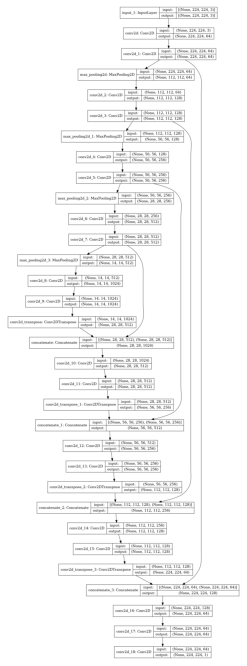

In [7]:
# 모델 시각화
plot_model(model, to_file='unet_model.png', show_shapes=True, show_layer_names=True)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 위에서 정의한 모델 시각화 코드 실행

# 이미지 파일을 읽어서 표시
img = mpimg.imread('unet_model.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

#### 모델 학습하기

* 이제 모델을 만들었으니 위에서 만들어본 데이터셋과 학습을 해봅시다! (모델 학습에 상당한 시간이 소요됨으로 학습이 잘 진행되는지 확인해 보시고 다음 스텝으로 넘어가셔서 이미 학습된 모델을 사용하셔도 됩니다.)
* **모델구조에서 '도로(7)'을 학습하는 지 확인된다.**

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CSVLogger

model_path = os.getenv('HOME')+'/aiffel/semantic_segmentation/seg_model_unet.h5'
log_path = os.getenv('HOME')+'/aiffel/semantic_segmentation/seg_model_unet_log.csv'

checkpoint = ModelCheckpoint(filepath=model_path, 
                             monitor='val_loss', 
                             save_best_only=True,
                             save_weights_only=False,
                             mode='min')

csv_logger = CSVLogger(filename=log_path, append=False)

model = build_model()
model.compile(optimizer = Adam(1e-4), loss = 'binary_crossentropy')
history = model.fit(    
                    train_generator,
                    validation_data=test_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=50,
                    callbacks=[checkpoint, csv_logger]
                    )

Epoch 1/50
11/11 [==============================] - 8s 587ms/step - loss: 0.6883 - val_loss: 0.6775
Epoch 2/50
11/11 [==============================] - 6s 565ms/step - loss: 0.6428 - val_loss: 0.5098
Epoch 3/50
11/11 [==============================] - 6s 564ms/step - loss: 0.2433 - val_loss: 0.2819
Epoch 4/50
11/11 [==============================] - 6s 543ms/step - loss: 0.1882 - val_loss: 0.2819
Epoch 5/50
11/11 [==============================] - 6s 546ms/step - loss: 0.2281 - val_loss: 0.2819
Epoch 6/50
 8/11 [====================>.........] - ETA: 1s - loss: 0.2843

KeyboardInterrupt: 

In [ ]:
import pandas as pd

csv_logger = pd.read_csv(log_path)
csv_logger

In [ ]:
# 올바르게 figure와 ax를 생성합니다
fig, ax = plt.subplots(1, 1, figsize=(7, 5))



# 훈련 및 검증 손실을 플로팅합니다
ax.plot(csv_logger['epoch']+1, csv_logger['loss'], 'bo:', label='Train Loss' )
ax.plot(csv_logger['epoch']+1, csv_logger['val_loss'], 'ro:', label='Validation Loss')

# 라벨을 추가합니다
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# 범례를 추가합니다
ax.legend()

# 그래프를 출력합니다
plt.show()

### 시맨틱 세그멘테이션 모델 시각화

이번에는 학습한 모델의 결과를 눈으로 확인해 볼 차례입니다. 우선 이전 스텝에서 저장한 모델이나 제공된 모델을 다음 코드를 통해 불러와 주세요.

In [ ]:
# 미리 준비한 모델을 불러오려면 아래 주석을 해제하세요
model_path = dir_path + '/seg_model_unet.h5' 

model = tf.keras.models.load_model(model_path)

테스트 셋은 이미지를 제공하지만 정답 데이터를 제공하지 않으니 눈으로 확인할 수 있도록 모델이 추론(inference)한 결과를 우리의 눈으로 볼 수 있는 세그멘테이션 이미지로 만들어주세요!
각각을 prediction, target이라고 불렀을 때 이를 계산하는 함수를 구현해 보겠습니다.

세그멘테이션이 성능을 정량적으로 측정하기 위한 방법으로 IoU(Intersection over Union)를 계산하게 됩니다. IoU를 계산하는 방법은 지난 시간에 소개한 바 있으므로 해당 내용을 활용하여 구현해 보겠습니다.
**IoU를 계산하려면 모델이 도로 영역이라고 판단한 부분이 1로, 나머지 부분이 0으로 표시된 행렬, 그리고 라벨 데이터에서 도로 영역이 1, 나머지 부분이 0으로 표시된 행렬이 필요합니다.** 

In [ ]:
def get_output(model, preproc, image_path, output_path, label_path):
    origin_img = imread(image_path)
    data = {"image":origin_img}
    processed = preproc(**data)
    output = model(np.expand_dims(processed["image"]/255,axis=0))
    output = (output[0].numpy()>=0.5).astype(np.uint8).squeeze(-1)*255  #0.5라는 threshold를 변경하면 도로인식 결과범위가 달라집니다.
    prediction = output/255   # 도로로 판단한 영역
    
    output = Image.fromarray(output)
    background = Image.fromarray(origin_img).convert('RGBA')
    output = output.resize((origin_img.shape[1], origin_img.shape[0])).convert('RGBA')
    output = Image.blend(background, output, alpha=0.5)
    output.show()   # 도로로 판단한 영역을 시각화!
     
    if label_path:   
        label_img = imread(label_path)
        label_data = {"image":label_img}
        label_processed = preproc(**label_data)
        label_processed = label_processed["image"]
        target = (label_processed == 7).astype(np.uint8)*1   # 라벨에서 도로(7)로 기재된 영역

        return output, prediction, target
    else:
        return output, prediction, _

In [ ]:
def calculate_iou_score(target, prediction):
    
   # Ensure target and prediction are numpy arrays
    target = np.asarray(target)
    prediction = np.asarray(prediction)
    
    # Flatten the arrays to 1D
    target = target.flatten()
    prediction = prediction.flatten()
    
    # Calculate intersection and union
    intersection = np.sum((target == 1) & (prediction == 1))
    union = np.sum((target == 1) | (prediction == 1))
    
    # Calculate IoU score
    iou_score = intersection / union if union != 0 else 0.0
    
    print('IoU : %.2f' % iou_score)
    return iou_score

In [ ]:
# 완성한 뒤에는 시각화한 결과를 눈으로 확인해봅시다!
i = 1    # i값을 바꾸면 테스트용 파일이 달라집니다. 
output, prediction, target = get_output(
     model, 
     test_preproc,
     image_path=dir_path + f'/image_2/00{str(i).zfill(4)}_10.png',
     output_path=dir_path + f'./result_{str(i).zfill(3)}.png',
     label_path=dir_path + f'/semantic/00{str(i).zfill(4)}_10.png'
 )

calculate_iou_score(target, prediction)

# Project 

오늘의 과제는 바로 U-Net++ 모델을 스스로의 힘으로 직접 구현해 보고, U-Net을 활용했던 도로 세그멘테이션 태스크에 적용하여 U-Net을 썼을 때보다 성능이 향상되었음을 확인해 보는 것입니다. 정성적으로는 두 모델의 세그멘테이션 결과를 시각화해서 비교해 볼 수 있을 것이고, 정량적으로는 동일 이미지에 대한 IoU 값을 비교해 보면 될 것입니다.

### Step 1. KITTI 데이터셋 수집과 구축
다운로드한 KITTI 데이터에 data augmentation을 적용한 형태로 데이터셋을 구축합니다. 이때 주의할 점이 있습니다. U-Net++는 메모리 사용량이 U-Net보다 꽤 많아집니다. 그러니 배치 사이즈를 적절히 줄여서 설정하시기를 권합니다.

### Step 2. U-Net++ 모델의 구현
U-Net의 모델 구조와 소스코드를 면밀히 비교해 보다 보면, U-Net++를 어떻게 구현할 수 있을지에 대한 방안을 떠올릴 수 있을 것입니다. 이 과정을 통해 U-Net 자체에 대한 이해도도 증진될 것입니다. 그 외 적절히 U-Net의 백본 구조, 기타 파라미터 변경 등을 통해 추가적인 성능 향상이 가능할 수도 있습니다.

#### Unet++ 모델 함수

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from tensorflow.keras.models import Model

def conv_block(input_tensor, num_filters):
    x = Conv2D(num_filters, (3, 3), padding='same', activation='relu')(input_tensor)
    x = Conv2D(num_filters, (3, 3), padding='same', activation='relu')(x)
    return x

def build_unet_plus_plus(input_shape=(224, 224, 3), num_classes=1,deep_supervision=False):
    inputs = Input(input_shape)
    
    # Encoder (Downsampling)
    c1_1 = conv_block(inputs, 64)
    p1 = MaxPooling2D((2, 2))(c1_1)
    
    c2_1 = conv_block(p1, 128)
    p2 = MaxPooling2D((2, 2))(c2_1)
    
    c3_1 = conv_block(p2, 256)
    p3 = MaxPooling2D((2, 2))(c3_1)
    
    c4_1 = conv_block(p3, 512)
    p4 = MaxPooling2D((2, 2))(c4_1)
    
    c5_1 = conv_block(p4, 1024)
    
    # Decoder (Upsampling)
    
    # Level 4
    u4_2 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5_1)
    c4_2 = concatenate([u4_2, c4_1])
    c4_2 = conv_block(c4_2, 512)
    
    # Level 3
    u3_2 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c4_1)
    u3_3 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c4_2)
    c3_2 = concatenate([u3_2, c3_1])
    c3_2 = conv_block(c3_2, 256)
    c3_3 = concatenate([u3_3, c3_2, c3_1])
    c3_3 = conv_block(c3_3, 256)
    
    # Level 2
    u2_2 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3_1)
    u2_3 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3_2)
    u2_4 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3_3)
    c2_2 = concatenate([u2_2, c2_1])
    c2_2 = conv_block(c2_2, 128)
    c2_3 = concatenate([u2_3, c2_2, c2_1])
    c2_3 = conv_block(c2_3, 128)
    c2_4 = concatenate([u2_4, c2_3, c2_2, c2_1])
    c2_4 = conv_block(c2_4, 128)
    
    # Level 1
    u1_2 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c2_1)
    u1_3 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c2_2)
    u1_4 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c2_3)
    u1_5 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c2_4)
    c1_2 = concatenate([u1_2, c1_1])
    c1_2 = conv_block(c1_2, 64)
    c1_3 = concatenate([u1_3, c1_2, c1_1])
    c1_3 = conv_block(c1_3, 64)
    c1_4 = concatenate([u1_4, c1_3, c1_2, c1_1])
    c1_4 = conv_block(c1_4, 64)
    c1_5 = concatenate([u1_5, c1_4, c1_3, c1_2, c1_1])
    c1_5 = conv_block(c1_5, 64)
    
    # Deep supervision outputs
    out1 = Conv2D(num_classes, (1, 1), activation='sigmoid', name='out1')(c1_2)
    out2 = Conv2D(num_classes, (1, 1), activation='sigmoid', name='out2')(c1_3)
    out3 = Conv2D(num_classes, (1, 1), activation='sigmoid', name='out3')(c1_4)
    out4 = Conv2D(num_classes, (1, 1), activation='sigmoid', name='out4')(c1_5)
    
    if deep_supervision:
        model = Model(inputs=[inputs], outputs=[out1, out2, out3, out4])
    else: 
        model = Model(inputs=[inputs], outputs=[out4])
    return model

# Create the model
model = build_unet_plus_plus(input_shape=(224, 224, 3), num_classes=1,deep_supervision=False)
model.summary()

#### loss함수 & '@tf.keras.utils.register_keras_serializable()'  데코레이터 추가(1회 적용)

In [ ]:
from tensorflow.keras import backend as K

def dice_coef(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1. - dice_coef(y_true, y_pred)


@tf.keras.utils.register_keras_serializable() # 함수를 Keras에 등록(모델 저장 및 로드 시 인식할 수 있게 합니다.), 1회 적용
def bce_dice_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

이 방식을 사용하면 loss의 구간이 [-1,inf)로 발생한다. 위의 방식과는 개념적 전환이지 대입식 전환이 아니다. 
>@tf.keras.utils.register_keras_serializable()  
def bce_dice_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) - dice_coef(y_true, y_pred)

#### 모델 compile & fit

In [ ]:
import os
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CSVLogger

model_path_dash = os.getenv('HOME')+'/aiffel/semantic_segmentation/seg_model_unet++.h5'
log_path_dash = os.getenv('HOME')+'/aiffel/semantic_segmentation/seg_model_unet++_log.csv'
model_path_dash_ds = os.getenv('HOME')+'/aiffel/semantic_segmentation/seg_model_unet++ds.h5'
log_path_dash_ds = os.getenv('HOME')+'/aiffel/semantic_segmentation/seg_model_unet++ds_log.csv'


# # UNet++ 모델
# model = build_unet_plus_plus(input_shape=(224, 224, 3), num_classes=1,deep_supervision=False)
# # 모델 컴파일
# if len(model.outputs) == 1:  # deep_supervision이 False인 경우
#     model.compile(optimizer=Adam(learning_rate=1e-4),
#                   loss=bce_dice_loss,
#                   )
# else:  # deep_supervision이 True인 경우
#     model.compile(optimizer=Adam(learning_rate=1e-4),
#                   loss=[bce_dice_loss] * len(model.outputs),
#                   loss_weights=[1.0 / len(model.outputs)] * len(model.outputs))

# checkpoint = ModelCheckpoint(filepath=model_path_dash, 
#                              monitor='val_loss', 
#                              save_best_only=True,
#                              save_weights_only=False,
#                              mode='min')

# csv_logger = CSVLogger(filename=log_path_dash, append=False)
        
# history = model.fit(
#                     train_generator,
#                     validation_data=test_generator,
#                     steps_per_epoch=len(train_generator),
#                     batch_size=16,
#                     epochs=50,
#                     callbacks=[checkpoint, csv_logger]
#                     )

### Case of 'deep_supervision=False'

In [ ]:
import pandas as pd

csv_logger_dash = pd.read_csv(log_path_dash)
csv_logger_dash

In [ ]:
# 올바르게 figure와 ax를 생성합니다
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

# 훈련 및 검증 손실을 플로팅합니다
ax.plot(csv_logger_dash['epoch']+1, csv_logger_dash['loss'], 'bo:', label='Train Loss' )
ax.plot(csv_logger_dash['epoch']+1, csv_logger_dash['val_loss'], 'ro:', label='Validation Loss')

# 라벨을 추가합니다
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# 범례를 추가합니다
ax.legend()

# 그래프를 출력합니다
plt.show()

In [ ]:
model_dash = tf.keras.models.load_model(model_path_dash)

In [ ]:
# 완성한 뒤에는 시각화한 결과를 눈으로 확인해봅시다!
i = 1    # i값을 바꾸면 테스트용 파일이 달라집니다. 
output, prediction, target = get_output(
     model_dash, 
     test_preproc,
     image_path=dir_path + f'/image_2/00{str(i).zfill(4)}_10.png',
     output_path=dir_path + f'./result_{str(i).zfill(3)}.png',
     label_path=dir_path + f'/semantic/00{str(i).zfill(4)}_10.png'
 )

calculate_iou_score(target, prediction)

### Case of 'deep_supervision=True'

In [ ]:
import pandas as pd

csv_logger_dash_ds = pd.read_csv(log_path_dash_ds)
csv_logger_dash_ds

In [ ]:
# 올바르게 figure와 ax를 생성합니다
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

# 훈련 및 검증 손실을 플로팅합니다
ax.plot(csv_logger_dash_ds['epoch']+1, csv_logger_dash_ds['loss'], 'bo:', label='Train Loss' )
ax.plot(csv_logger_dash_ds['epoch']+1, csv_logger_dash_ds['val_loss'], 'ro:', label='Validation Loss')

# 라벨을 추가합니다
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# 범례를 추가합니다
ax.legend()

# 그래프를 출력합니다
plt.show()

In [ ]:
model_dash_ds = tf.keras.models.load_model(model_path_dash_ds)

In [ ]:
def get_output_ds(model, preproc, image_path, output_path, label_path):
    origin_img = imread(image_path)
    data = {"image":origin_img}
    processed = preproc(**data)
    model_input = np.expand_dims(processed["image"].astype(np.float32)/255, axis=0)
    outputs = model(model_input)
    
    # deep_supervision이 True일 때 여러 출력을 처리
    if isinstance(outputs, list):
        output = outputs[-1]  # 마지막 출력 사용
    else:
        output = outputs

    output = (output.numpy()>=0.5).astype(np.uint8).squeeze()*255  # squeeze() 사용하여 불필요한 차원 제거
    prediction = output/255
    
    # 2D 이미지로 변환
    if output.ndim == 3 and output.shape[2] == 1:
        output = output.squeeze(-1)
    
    output_img = Image.fromarray(output, mode='L')  # 그레이스케일 이미지로 변환
    background = Image.fromarray(origin_img).convert('RGBA')
    output_img = output_img.resize((origin_img.shape[1], origin_img.shape[0])).convert('RGBA')
    result = Image.blend(background, output_img, alpha=0.5)
    result.show()   # 도로로 판단한 영역을 시각화!
    
    if label_path:   
        label_img = imread(label_path)
        label_data = {"image":label_img}
        label_processed = preproc(**label_data)
        label_processed = label_processed["image"]
        target = (label_processed == 7).astype(np.uint8)*1   # 라벨에서 도로(7)로 기재된 영역
        return result, prediction, target
    else:
        return result, prediction, None

In [ ]:
# 완성한 뒤에는 시각화한 결과를 눈으로 확인해봅시다!
i = 1    # i값을 바꾸면 테스트용 파일이 달라집니다. 
output, prediction, target = get_output_ds(
     model_dash_ds, 
     test_preproc,
     image_path=dir_path + f'/image_2/00{str(i).zfill(4)}_10.png',
     output_path=dir_path + f'./result_{str(i).zfill(3)}.png',
     label_path=dir_path + f'/semantic/00{str(i).zfill(4)}_10.png'
 )

calculate_iou_score(target, prediction)

### Step 3. U-Net 과 U-Net++ 모델이 수행한 세그멘테이션 결과 분석
두 모델의 정량적, 정성적 성능을 비교해 봅시다. 시각화, IoU 계산 등을 체계적으로 시도해 보면 차이를 발견하실 수 있을 것입니다.

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].plot(csv_logger['epoch']+1, csv_logger['loss'], 'bo:', label='Train Loss' )
ax[0].plot(csv_logger['epoch']+1, csv_logger['val_loss'], 'ro:', label='Validation Loss')
ax[0].legend()
ax[0].set_title('Unet')

ax[1].plot(csv_logger_dash['epoch']+1, csv_logger_dash['loss'], 'bo:', label='Train Loss' )
ax[1].plot(csv_logger_dash['epoch']+1, csv_logger_dash['val_loss'], 'ro:', label='Validation Loss')
ax[1].legend()
ax[1].set_title('Unet++')
                
ax[2].plot(csv_logger_dash_ds['epoch']+1, csv_logger_dash_ds['loss'], 'bo:', label='Train Loss' )
ax[2].plot(csv_logger_dash_ds['epoch']+1, csv_logger_dash_ds['val_loss'], 'ro:', label='Validation Loss')
ax[2].legend()
ax[2].set_title('Unet++w/deep_supervision')
                
plt.show()

> Unet은 validation loss가 epochs=3 에서 수렴했고, Unet++와 Unet++w/deep_supervision에서는 epochs을 늘리면 좀 더 나은 결과가 나올 수 있을 거라고 생각한다. 

In [ ]:
models = [model, model_dash, model_dash_ds]
model_names = ['Unet', 'Unet++', 'Unet++w/deep_supervision']

def plot_model_outputs(models, preproc, image_path, output_path, label_path):
    fig, ax = plt.subplots(1, len(models), figsize=(20, 5))

    for i, model in enumerate(models):
        result, prediction, target = get_output_ds(model, preproc, image_path, output_path, label_path)

        ax[i].imshow(result)
        ax[i].axis('off')
        ax[i].set_title( '{0} (IoU:{1:0.2f})'.format(model_names[i],calculate_iou_score(target, prediction)) )
        
#     plt.tight_layout()
#     plt.show()

i=1
plot_model_outputs(models, 
     test_preproc,
     image_path=dir_path + f'/image_2/00{str(i).zfill(4)}_10.png',
     output_path=dir_path + f'./result_{str(i).zfill(3)}.png',
     label_path=dir_path + f'/semantic/00{str(i).zfill(4)}_10.png')

> Unet보다는 Unet++에서 2배가 넘는 효율을 보였습니다.  
Unet++자체에서 deep_supervision 이용했을 때는 큰 차이를 보이지 않았습니다.

# 회고
* 진행과정에서 의심에 의심을 더하여 조심스럽게 접근하는게 필요하다고 생각했다.
* 꼭 필요한 argument인가를 생각할 기회가 있었다.
* 결과를 비교하는 방법에 대해 여러가지 방안을 고민하면서 기존에 해보지 않은 것을 많이 해봤습니다.
  e.g) checkpoints, csvlogger, 그래프 합